In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(21,321)]
i =0
result = np.zeros((3600))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.PREC_F.nc')
        PREC_F = data.variables['PREC_F'][0,:,:]
        lont = data.variables['TLONG'][:,:]
        latt = data.variables['TLAT'][:,:]
        lont = lont[280:344,700:1400]
        latt = latt[280:344,700:1400]
        PREC_F = PREC_F[280:344,700:1400]

        
        aveplot = PREC_F.mean(axis=0)
        aveplot = aveplot.mean(axis=0)
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [5]:
qq = result#.sum(axis=1)
#data1 = qq.reshape(12,40)

In [6]:
#qq2 = data1.mean(axis=0)

In [11]:
ww2 = np.convolve(qq, np.ones((12,))/12, mode='valid')

In [12]:

#ttq= qq2.mean()
#tt3q= qq2-ttq

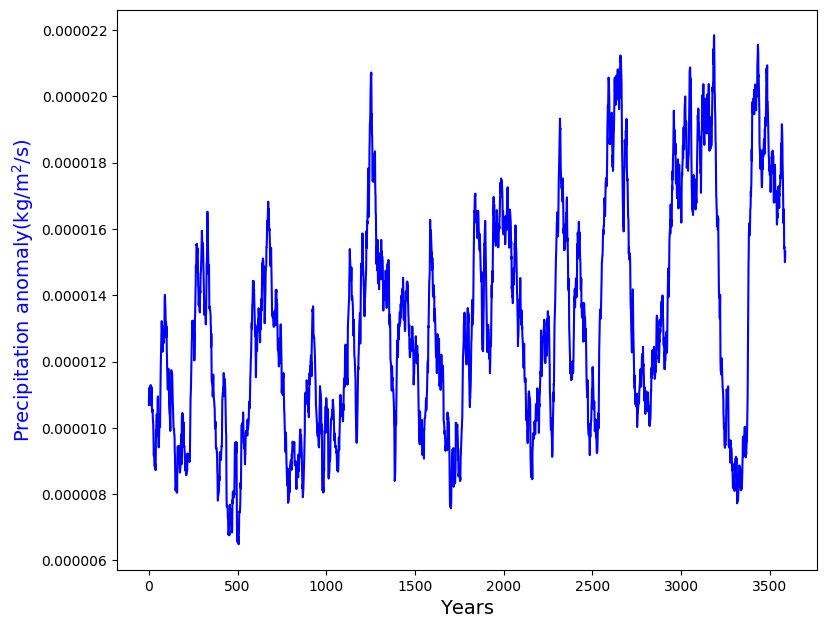

In [13]:
my_font = {'fontname':'Cambria', 'size':'14'}
fig = plt.figure(figsize=(10,8), dpi=100)
ax0 = fig.add_axes([0.2, 0.1, 0.7, 0.7])
ax0.plot(ww2,'b')
#plt.ylim(ymin = tt3q.min())
#plt.ylim(ymax = -tt3q.min())
plt.ylabel('Precipitation anomaly(kg/m$^2$/s)',**my_font)
#plt.xticks(range(0,40,5), ['140', '145','150', '155', '160', '165','170','175','180'])
plt.xlabel('Years',**my_font)
ax0.yaxis.label.set_color('b')
#ax2 = ax0.twinx() 
#plt.hlines(0, 0, 40, colors = "y",linestyles = "dashed")
#ax2.plot(ww3q*0.0001,'r')
#plt.ylim(ymin = -ww3q.max()*0.0001)
#plt.ylim(ymax = ww3q.max()*0.0001)
#plt.ylabel('Wind stress curl anomaly(N/m$^3$)',**my_font)
#ax2.yaxis.label.set_color('red')
#plt.savefig("pre.png")